<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:60px;background-color:#042CE0;overflow:hidden;font-weight:800">Time Spent</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/americans-time-spent-with-relationships/Americans_Time_spent_with_relationships_by_age.csv
/kaggle/input/americans-time-spent-with-relationships/percentage-of-americans-living-alone-by-age.csv


## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Time is the ultimate limited resource, an equalizer that ticks away relentlessly for every individual**


## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/americans-time-spent-with-relationships/Americans_Time_spent_with_relationships_by_age.csv')


In [4]:
# Check first 5 lines

df.head()

,Unnamed: 0,Entity,Code,Year,"Time spent alone, by age of respondent (United States)","Time spent with friends, by age of respondent (United States)","Time spent with children, by age of respondent (United States)","Time spent with with parents, siblings and other family, by age of respondent (United States)","Time spent with partner, by age of respondent (United States)","Time spent with coworkers, by age of respondent (United States)"
0,0,United States,USA,15,193.30588,109.41450,23.463852,267.12091,0.000000,8.342007
1,1,United States,USA,16,206.37056,110.74180,28.609867,254.33810,0.030691,23.529137
2,2,United States,USA,17,224.17331,120.41887,26.089708,229.81561,1.122841,43.809685
3,3,United States,USA,18,242.69839,137.75107,27.387308,236.35201,5.697267,81.633575
4,4,United States,USA,19,267.79385,129.85716,36.445004,201.27660,19.341291,124.850520


## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
df.drop(["Unnamed: 0", "Entity", "Code"], axis=1, inplace=True)


In [6]:
# Rename the columns.
df.rename(columns = {'Time spent alone, by age of respondent (United States)':'alone',
                     'Time spent with friends, by age of respondent (United States)':'friends',
                     'Time spent with children, by age of respondent (United States)':'children',
                     'Time spent with with parents, siblings and other family, by age of respondent (United States)':'parents_family',
                     'Time spent with partner, by age of respondent (United States)':'partner',
                     'Time spent with coworkers, by age of respondent (United States)':'coworkers',
                     'Year':'Age'
                     }, inplace = True)

In [7]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (67, 7)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Age,int64,0,0.0,0,67,67,15.000000,85.00000,48.059701,19.593506,15.000000,16.000000,17.000000
alone,float64,0,0.0,0,67,67,193.305880,501.88327,348.618974,85.989956,193.305880,206.370560,224.173310
friends,float64,0,0.0,0,67,67,28.917883,137.75107,52.297102,28.672687,109.414500,110.741800,120.418870
children,float64,0,0.0,0,67,67,23.463852,266.07874,116.890738,77.893454,23.463852,28.609867,26.089708
parents_family,float64,0,0.0,0,67,67,47.977863,267.12091,81.602015,50.512878,267.120910,254.338100,229.815610
partner,float64,0,0.0,0,67,67,0.000000,276.13379,182.717405,72.101971,0.000000,0.030691,1.122841
coworkers,float64,0,0.0,0,67,67,3.249441,215.61365,125.286948,73.394229,8.342007,23.529137,43.809685


<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#042CE0;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> No Missing, No Dups</div>

In [8]:
cols = ['alone', 'friends', 'children', 'parents_family',
       'partner', 'coworkers']

In [9]:
# Change the column 'Age' to str.
df['Age'] = df['Age'].astype(str)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             67 non-null     object 
 1   alone           67 non-null     float64
 2   friends         67 non-null     float64
 3   children        67 non-null     float64
 4   parents_family  67 non-null     float64
 5   partner         67 non-null     float64
 6   coworkers       67 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.8+ KB


In [11]:
df['Age'].unique()

array(['15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69',
       '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80',
       '85'], dtype=object)

## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#0023FF'> Americans_Time_spent_with_relationships_by_age</span></b>  

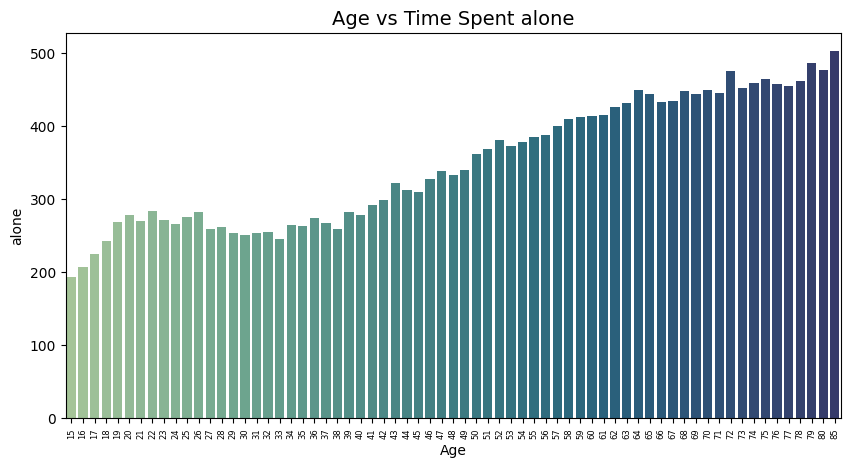

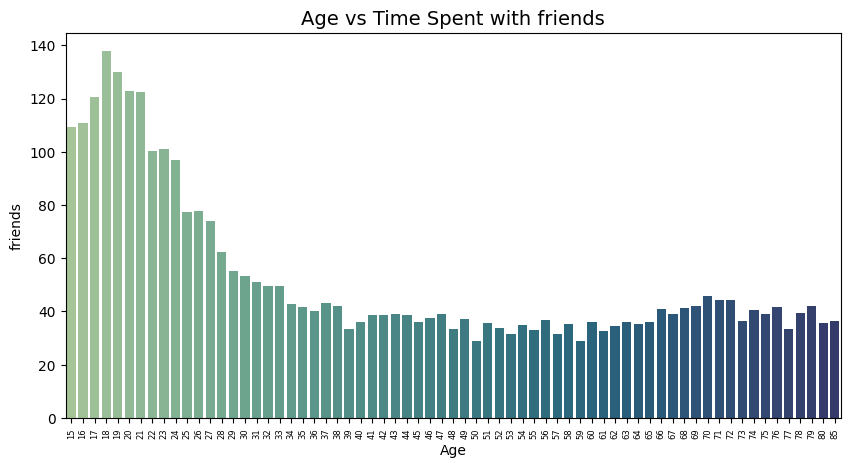

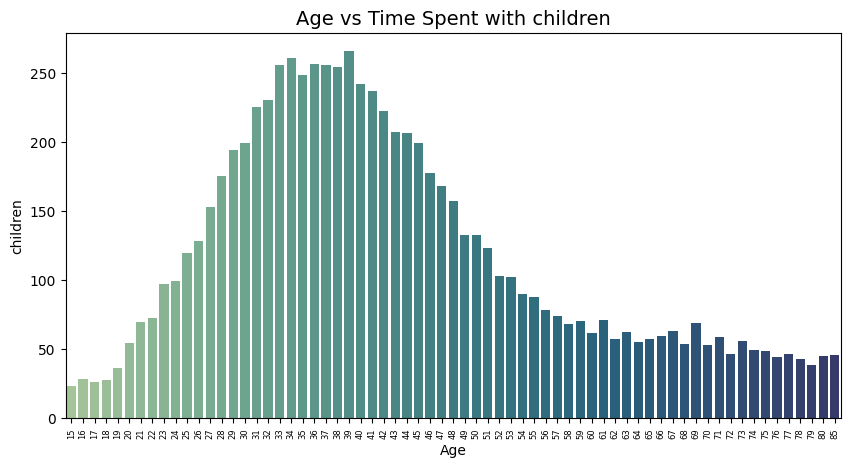

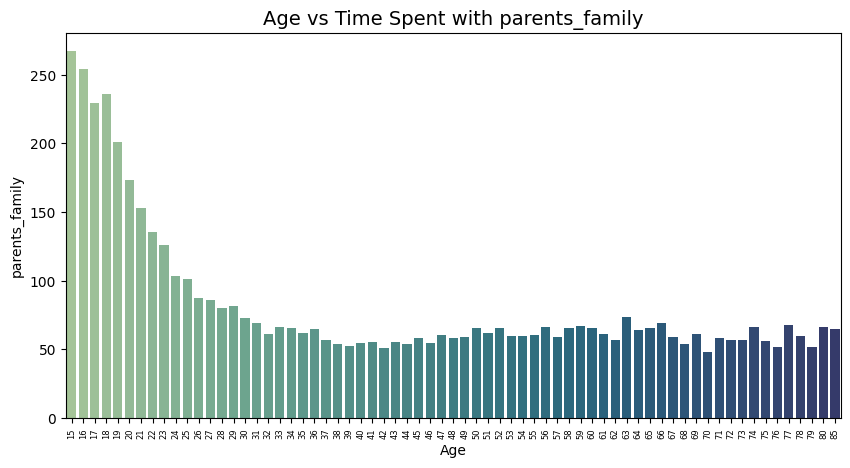

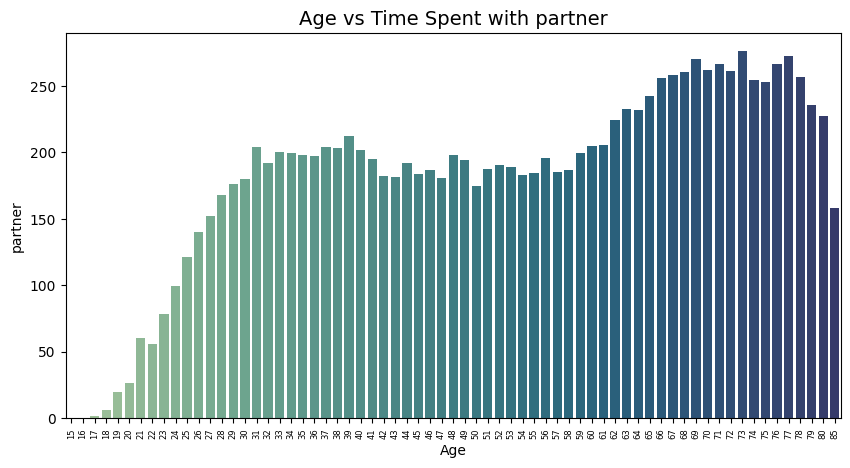

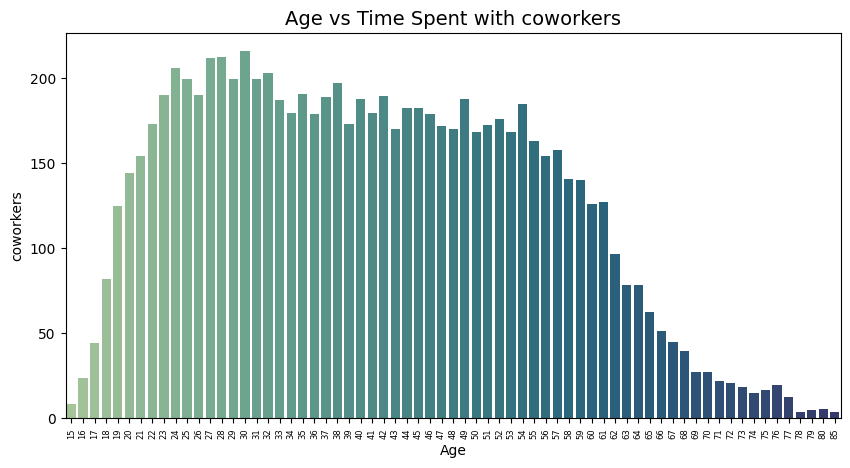

In [12]:
# Age vs Time Spent
for i in cols:
    
    if i == 'alone':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(data=df, x = 'Age', y = i, palette = 'crest')
        plt.title('Age vs Time Spent alone', fontsize = 14)
        plt.xticks(rotation=90, fontsize = 6)
        plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.barplot(data=df, x = 'Age', y = i, palette = 'crest')
        plt.title('Age vs Time Spent with ' + i, fontsize = 14)
        plt.xticks(rotation=90, fontsize = 6)
        plt.show()

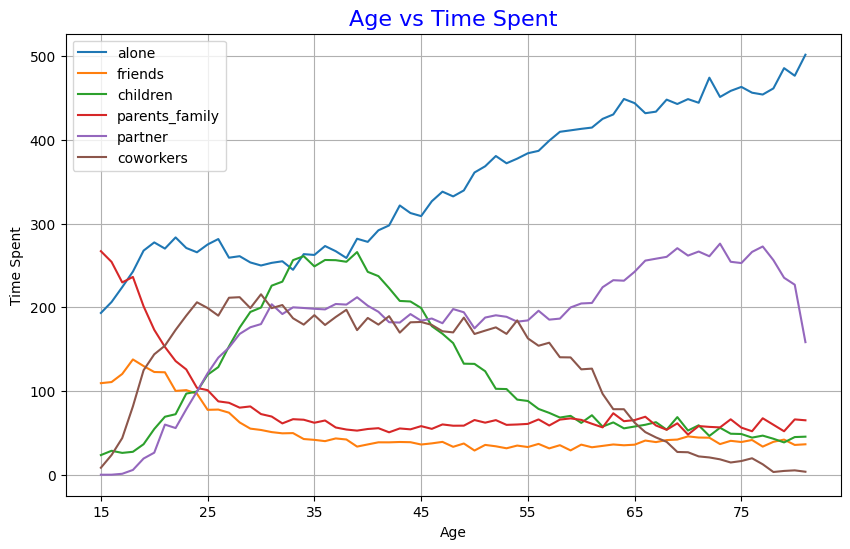

In [13]:
# Age vs Time Spent - Line
df.plot(x="Age", y=['alone', 'friends', 'children', 'parents_family', 'partner', 'coworkers'],
              kind="line", figsize=(10, 6))
plt.title("Age vs Time Spent", fontsize = 16, color = 'blue')
plt.ylabel('Time Spent', rotation=90, fontsize = 10)

plt.grid()
plt.show()

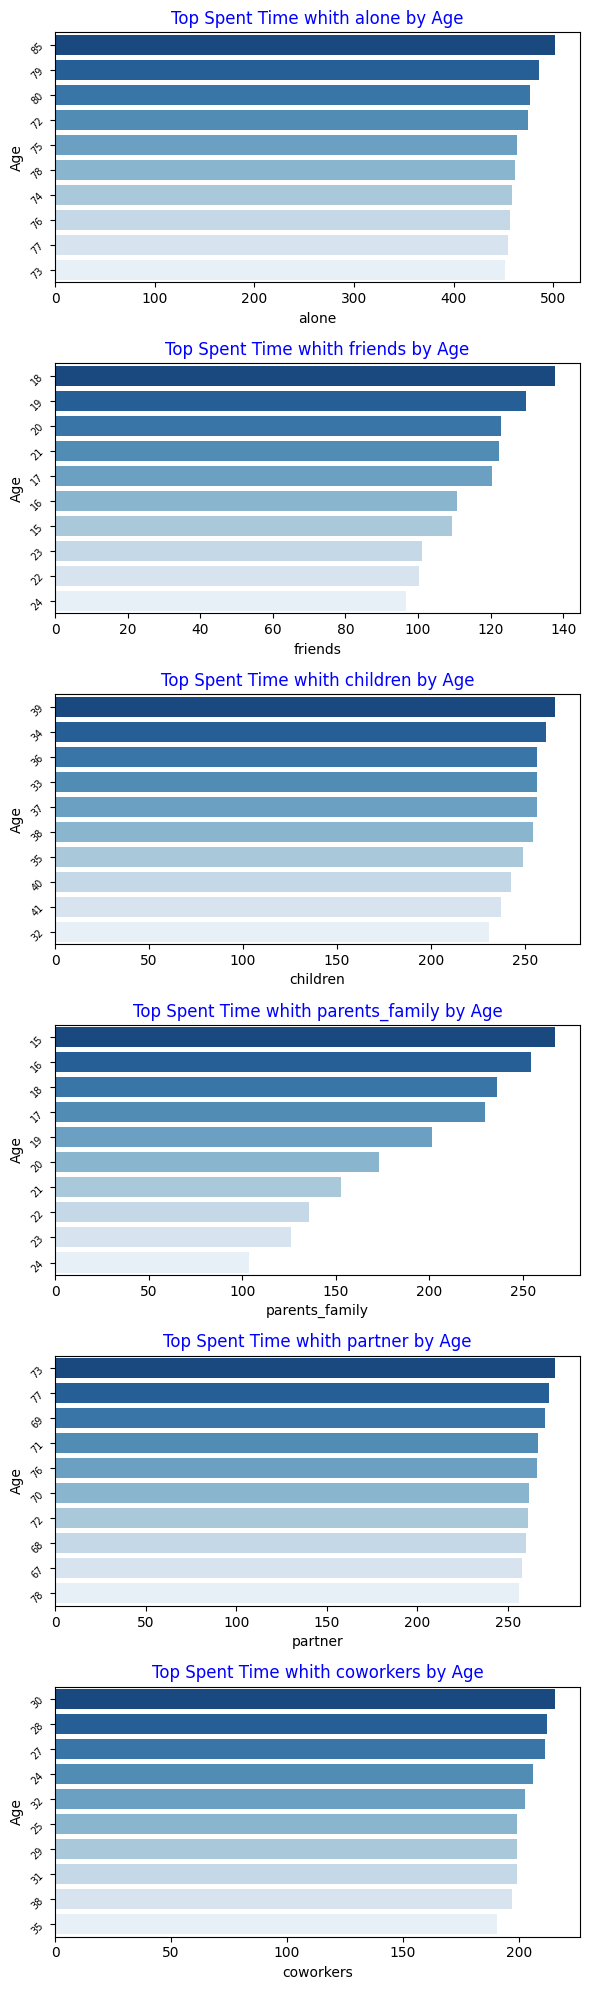

In [14]:
# Top 10 Spent Time by Age

fig, axes = plt.subplots(6, 1, figsize=(6, 20))

for ind, col in enumerate(cols):
    plt.subplot(6, 1, ind+1)
    df_top = df.groupby(['Age'])[[col]].sum().reset_index()
    df_top = df_top.sort_values(by=(col), ascending=False).head(10)

    sns.barplot(data=df_top, y=df_top["Age"], x=df_top[col], palette="Blues_r")
    plt.yticks(rotation=45, fontsize = 7)
    plt.title(f"Top Spent Time whith {col} by Age", fontsize = 12, color = 'blue')

plt.tight_layout()

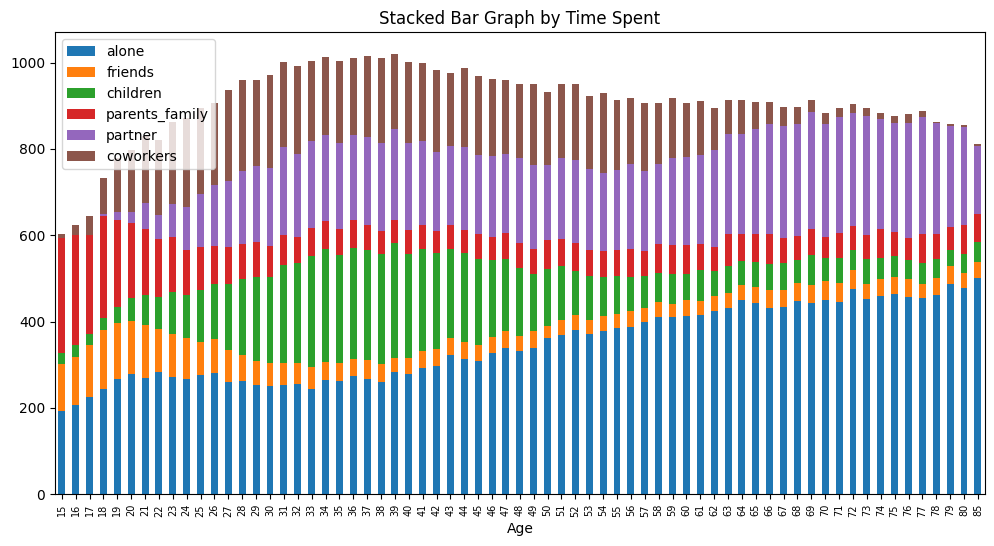

In [15]:
# Stacked Bar Graph by Time Spent

df.plot(x='Age', kind='bar', stacked=True, 
        title='Stacked Bar Graph by Time Spent', figsize=(12, 6))
plt.xticks(fontsize = 7)

plt.show()

In [16]:
df_1 = df.set_index('Age')
df_T = df_1.T
df_T.reset_index(level=0, inplace=True)
df_T.rename(columns = {'index':'Age'}, inplace = True)
df_T

Age,Age,15,16,17,18,19,20,21,22,23,...,72,73,74,75,76,77,78,79,80,85
0,alone,193.305880,206.370560,224.173310,242.698390,267.793850,277.603790,270.218170,283.566860,270.930150,...,474.455260,451.406370,458.674500,463.431950,456.494930,454.312500,461.639590,485.830750,476.767360,501.883270
1,friends,109.414500,110.741800,120.418870,137.751070,129.857160,122.740200,122.406270,100.168620,101.071770,...,44.234802,36.592476,40.508751,39.079994,41.503906,33.595589,39.297825,41.975792,35.589745,36.371460
2,children,23.463852,28.609867,26.089708,27.387308,36.445004,54.630512,69.293869,72.302246,96.935883,...,46.338203,56.115063,48.986588,48.644051,44.339306,46.719131,42.985035,38.609028,45.010258,45.463383
3,parents_family,267.120910,254.338100,229.815610,236.352010,201.276600,173.135030,152.673310,135.826600,125.793330,...,57.166805,56.550076,66.209770,56.281876,51.955276,67.455605,59.704296,51.944447,66.100365,65.052567
4,partner,0.000000,0.030691,1.122841,5.697267,19.341291,26.354170,59.897781,55.767094,78.188667,...,261.052150,276.133790,254.444950,252.933090,266.237120,272.730130,256.413760,235.370100,227.046340,158.420170
5,coworkers,8.342007,23.529137,43.809685,81.633575,124.850520,143.900300,154.209720,173.047300,190.105240,...,20.653986,18.386124,14.613341,16.366560,19.662245,12.479350,3.249441,4.532563,5.215204,3.573382


In [17]:
# Age = 15
px.pie(df_T, values='15' , names='Age',title='Age = 15', height=500 , width=550 , hover_name='Age')

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#042CE0;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> We can see that at 15 years of age the most time spent is with parents and family (44.4%) and the least time spent is with a partner (0%), which is natural.</div>

In [18]:
# Age = 85
px.pie(df_T, values='85' , names='Age',title='Age = 85', height=500 , width=550 , hover_name='Age')

<div class="alert alert-block alert-info" style="background-color:#DCECFD;color:#042CE0;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> We can see that at age 85 the most time spent is alone (61.9%) and the least time spent is with coworkers (0.44%), which is also natural.</div>

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#0023FF'> percentage-of-americans-living-alone-by-age</span></b>  

In [19]:
df_alone = pd.read_csv('/kaggle/input/americans-time-spent-with-relationships/percentage-of-americans-living-alone-by-age.csv')

In [20]:
# Check first 5 lines

df_alone.head()

,Entity,Code,Year,"Percentage of Americans living alone, by age, total (IPUMS)"
0,Age 18,NaN,1900,0.282610
1,Age 18,NaN,1920,0.297532
2,Age 18,NaN,1940,0.168288
3,Age 18,NaN,1960,0.508088
4,Age 18,NaN,1980,1.079198


In [21]:
df_alone.drop(["Code"], axis=1, inplace=True)


In [22]:
# Rename the columns.
df_alone.rename(columns = {'Percentage of Americans living alone, by age, total (IPUMS)':'IPUMS'
                     }, inplace = True)

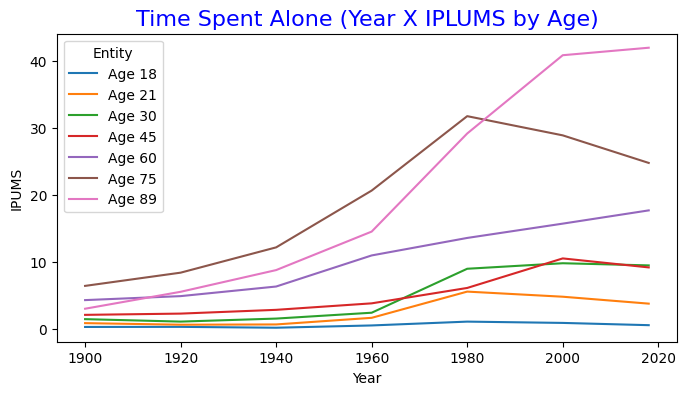

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(data=df_alone, x="Year", y="IPUMS", hue="Entity")
plt.title("Time Spent Alone (Year X IPLUMS by Age)", fontsize = 16, color = 'blue')
plt.show()


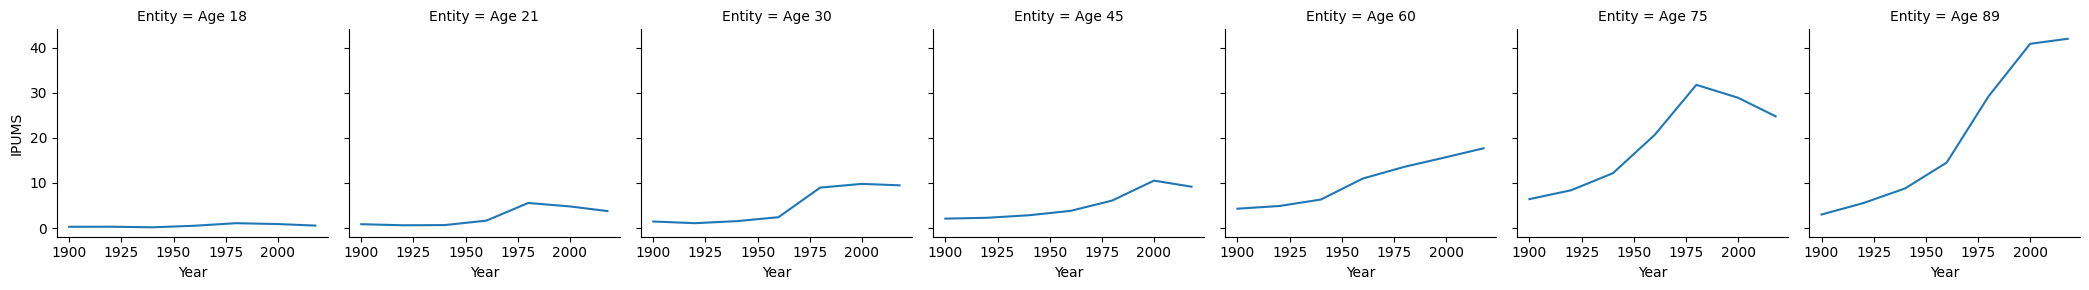

In [24]:
# Using FaceGrid to separate data into multiple graphs.

face_grid = sns.FacetGrid(df_alone, col="Entity")
face_grid.map(sns.lineplot, "Year", "IPUMS")
plt.show()

## <b><div style='padding:15px;background-color:#042CE0;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>